In [211]:
import torch
import matplotlib.pyplot as plt

In [212]:
def generate_random_normal_vector(size):
    v = torch.randn(size)
    return v / torch.linalg.norm(v)

In [284]:
size = 100
eigenvalues = torch.randn(size)
diag_matrix = torch.diag(eigenvalues)

In [285]:
# generate random orthogonal matrix U using Householder reflections
num_householder_vectors = 5
u_vectors = [generate_random_normal_vector(size) for _ in range(num_householder_vectors)]
U = torch.eye(size)
for u in u_vectors:
    U = torch.matmul(U, torch.eye(size) - 2 * torch.outer(u, u))

In [286]:
A = torch.matmul(U, torch.matmul(diag_matrix, U.T))

In [287]:
computed_eigenvalues, _ = torch.linalg.eig(A)
computed_eigenvalues = computed_eigenvalues.real

In [288]:
eigenvalues = eigenvalues.sort().values
computed_eigenvalues = computed_eigenvalues.sort().values
print(torch.allclose(eigenvalues, computed_eigenvalues, atol=1e-6))

True


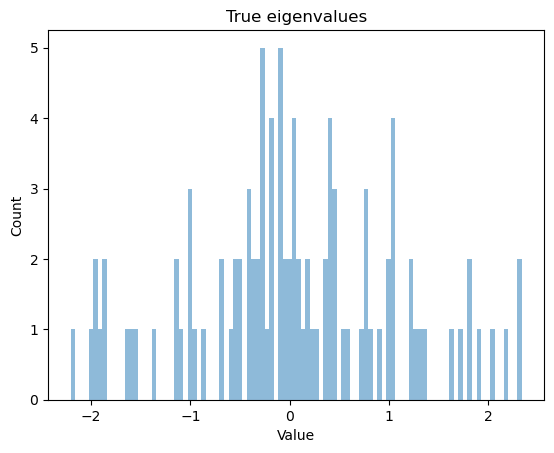

In [289]:
plt.hist(eigenvalues, bins=int(size), alpha=0.5, label='True eigenvalues')
plt.title('True eigenvalues')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

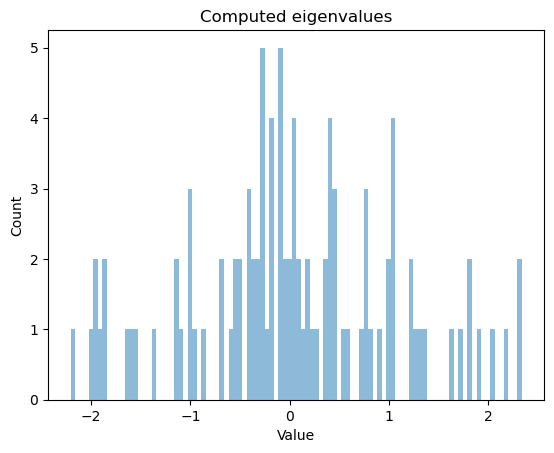

In [290]:
plt.hist(computed_eigenvalues, bins=int(size), alpha=0.5, label='Computed eigenvalues')
plt.title('Computed eigenvalues')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [291]:
# implement matrix vector product of A with h iteratively through u vectors recursively
def matrix_vector_product(u_vectors, diag_matrix, h):
    for u in u_vectors:
        h = h - 2 * torch.dot(u, h) * u
    h = torch.matmul(diag_matrix, h)
    for u in reversed(u_vectors):
        h = h - 2 * torch.dot(u, h) * u
    return h

In [292]:
# test matrix vector product
h = torch.ones(size)
computed_Ah = matrix_vector_product(u_vectors, diag_matrix, h)
true_Ah = torch.matmul(A, h)
print(torch.allclose(computed_Ah, true_Ah, atol=1e-6))

True
